### [문항 2]
2.분류 모델을 사용해서 건강검진 데이터를 바탕으로 전날 음주여부를 예측해 봅니다.
예측 모델 만들어서 모든 분류 알고리즘을 적용하여 모델별로 정확도, 정밀도, 재현율, F1-Score, AUC 값을 구하여
엑셀로 만들어서 소스파일과 함께 제출하시오. 또한 train, validation, test 테이터를 생성하여
각 데이터별 정확도 점수를 시각화한후에 평가 결과(쥬피터 노트북)를 작성하세요(데이터 분할은 Random_State=42 적용)
(엑셀로 만들어서 소스파일과 함께 제출하시오)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore') 


plt.rc('font', family='Malgun Gothic')
mlt.rcParams['axes.unicode_minus'] = False

In [3]:
health = pd.read_csv('C:/Users/hbi/Desktop/판다스/머신러닝/실습문제/health.csv', encoding='utf-8')
health

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,701999,1,11,41,160.0,70.0,88.0,0.6,0.3,...,14.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
1,2017,47933,1,13,41,165.0,70.0,91.0,0.5,0.6,...,21.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
2,2017,122314,2,8,47,160.0,55.0,73.0,0.9,1.0,...,17.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,401875,1,11,41,170.0,70.0,82.0,0.4,0.5,...,17.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,252501,1,13,26,155.0,50.0,90.0,1.2,1.2,...,53.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2017,998760,1,9,42,165.0,70.0,87.0,0.7,1.0,...,50.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
9996,2017,92096,1,11,29,165.0,65.0,84.0,1.2,1.2,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
9997,2017,379424,2,7,47,155.0,55.0,81.0,1.0,1.2,...,14.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
9998,2017,741399,1,10,31,175.0,75.0,84.0,1.5,1.5,...,69.0,2.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126


#### 결측치 처리

In [5]:
# 결측치 확인

health.isnull().sum()

# 기준년도, 가입자일련번호, 시도코드, 신장, 시력좌우, 청력 좌우, 데이터 공개일자 삭제

기준년도                0
가입자일련번호             0
성별코드                0
연령대코드(5세단위)         0
시도코드                0
신장(5Cm단위)           1
체중(5Kg 단위)          1
허리둘레                0
시력(좌)               3
시력(우)               3
청력(좌)               1
청력(우)               1
수축기혈압               0
이완기혈압               0
식전혈당(공복혈당)          0
총콜레스테롤              0
트리글리세라이드            0
HDL콜레스테롤            0
LDL콜레스테롤           27
혈색소                 0
요단백                38
혈청크레아티닌             0
(혈청지오티)AST          0
(혈청지오티)ALT          0
감마지티피               0
흡연상태                1
음주여부                0
구강검진 수검여부           0
치아우식증유무         10000
결손치유무           10000
치아마모증유무         10000
제3대구치(사랑니)이상    10000
치석               6059
데이터공개일자             0
dtype: int64

In [6]:
health.drop(['기준년도', '가입자일련번호', '시도코드','신장(5Cm단위)', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '데이터공개일자'], axis=1, inplace=True)
health

,성별코드,연령대코드(5세단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석
0,1,11,70.0,88.0,110.0,62.0,113.0,206.0,102.0,39.0,...,11.0,14.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN
1,1,13,70.0,91.0,112.0,67.0,86.0,124.0,156.0,36.0,...,23.0,21.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN
2,2,8,55.0,73.0,104.0,60.0,96.0,166.0,99.0,43.0,...,9.0,17.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,1,11,70.0,82.0,119.0,76.0,104.0,243.0,158.0,49.0,...,16.0,17.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0
4,1,13,50.0,90.0,128.0,84.0,97.0,267.0,243.0,51.0,...,29.0,53.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,9,70.0,87.0,130.0,80.0,85.0,333.0,205.0,42.0,...,40.0,50.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN
9996,1,11,65.0,84.0,132.0,82.0,98.0,269.0,112.0,59.0,...,20.0,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN
9997,2,7,55.0,81.0,100.0,70.0,100.0,164.0,52.0,48.0,...,14.0,14.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0
9998,1,10,75.0,84.0,130.0,81.0,109.0,214.0,164.0,73.0,...,20.0,69.0,2.0,1.0,1,NaN,NaN,NaN,NaN,0.0


<Axes: ylabel='Density'>

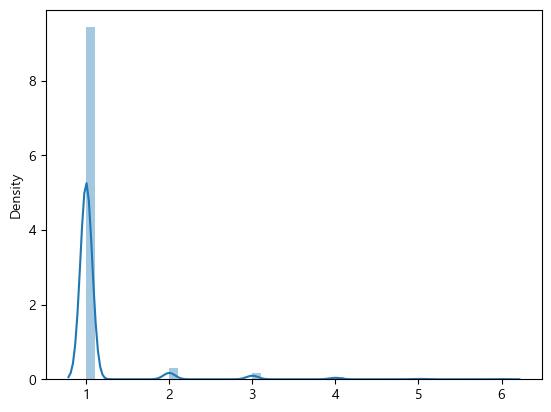

In [7]:
# 요단백 결측치 처리

# 삭제를 결정한 이유
# 검사를 하는 것 이외의 확인할 수 있는 방법이 아예 없음 ( 다른 변수들과의 관계를 통해 파악이 불가 )

# 요단백 그래프 그리기
sns.distplot(x=health['요단백'])

In [8]:
# 요단백 결측치 삭제
health.dropna(subset=['요단백'], inplace=True)

health['요단백'].isnull().sum()

0

In [9]:
# 치아 관련 항목 결측치 처리

# 삭제 결정 이유
# 치석 제거 이유 : 치석의 결측치 연령대 분포가 거의 비슷하고 컬럼 설명에 0 / 1 만 존재해야하는데 2가 존재하기 때문에 삭제
# 관련된 치아 정보들 또한 존재하지 않기 때문에 같이 제거 


health.drop(['구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석'], axis=1, inplace=True)
health

,성별코드,연령대코드(5세단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,1,11,70.0,88.0,110.0,62.0,113.0,206.0,102.0,39.0,147.0,12.2,4.0,5.0,12.0,11.0,14.0,2.0,0.0
1,1,13,70.0,91.0,112.0,67.0,86.0,124.0,156.0,36.0,56.0,14.6,1.0,1.2,28.0,23.0,21.0,2.0,0.0
2,2,8,55.0,73.0,104.0,60.0,96.0,166.0,99.0,43.0,103.0,9.9,1.0,0.5,15.0,9.0,17.0,1.0,1.0
3,1,11,70.0,82.0,119.0,76.0,104.0,243.0,158.0,49.0,162.0,14.8,1.0,1.0,20.0,16.0,17.0,1.0,0.0
4,1,13,50.0,90.0,128.0,84.0,97.0,267.0,243.0,51.0,167.0,15.1,1.0,0.8,44.0,29.0,53.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,9,70.0,87.0,130.0,80.0,85.0,333.0,205.0,42.0,250.0,16.1,1.0,1.3,34.0,40.0,50.0,3.0,0.0
9996,1,11,65.0,84.0,132.0,82.0,98.0,269.0,112.0,59.0,188.0,14.9,1.0,1.1,25.0,20.0,35.0,2.0,1.0
9997,2,7,55.0,81.0,100.0,70.0,100.0,164.0,52.0,48.0,106.0,14.0,1.0,0.7,18.0,14.0,14.0,1.0,0.0
9998,1,10,75.0,84.0,130.0,81.0,109.0,214.0,164.0,73.0,130.0,15.9,1.0,1.0,20.0,20.0,69.0,2.0,1.0


In [10]:
# LDL 콜레스테롤 결측치 처리

# LDL 콜레스테롤 구하는 식 : 트리글리세라이드 /5 + HDL + LDL = 총콜레스테롤
# 총 콜레스테롤 - 트리글리세라이드/5 - HDL

health['LDL콜레스테롤'] = health['LDL콜레스테롤'].fillna(round(health['총콜레스테롤'] - (health['트리글리세라이드']/5) - health['HDL콜레스테롤'],1))
health['LDL콜레스테롤'].isnull().sum()

0

In [11]:
health.isnull().sum()

성별코드           0
연령대코드(5세단위)    0
체중(5Kg 단위)     0
허리둘레           0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           1
음주여부           0
dtype: int64

In [12]:
# 신장, 체중, 흡연상태 결측치 처리
health.dropna(subset=['체중(5Kg 단위)', '흡연상태'], inplace=True)

In [13]:
# 결측치 확인
health.isnull().sum()

성별코드           0
연령대코드(5세단위)    0
체중(5Kg 단위)     0
허리둘레           0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
dtype: int64

#### 이상치 탐색

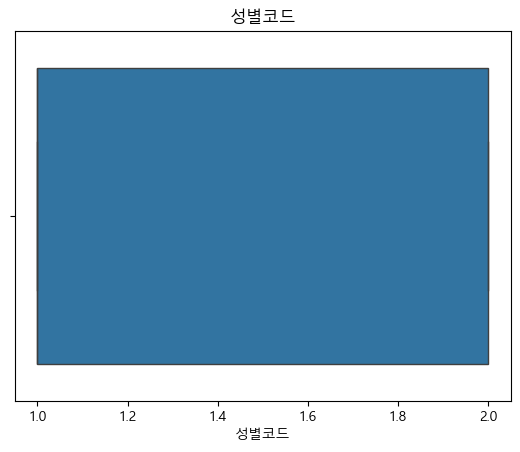

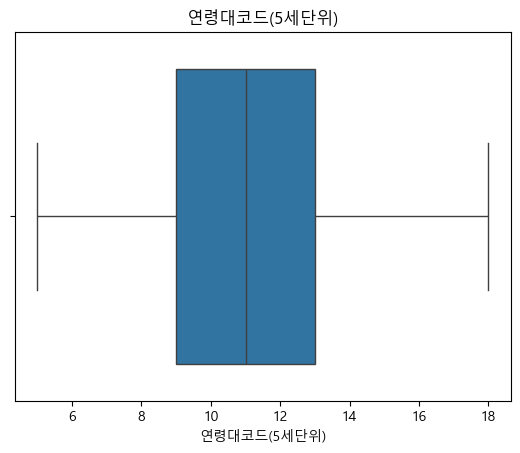

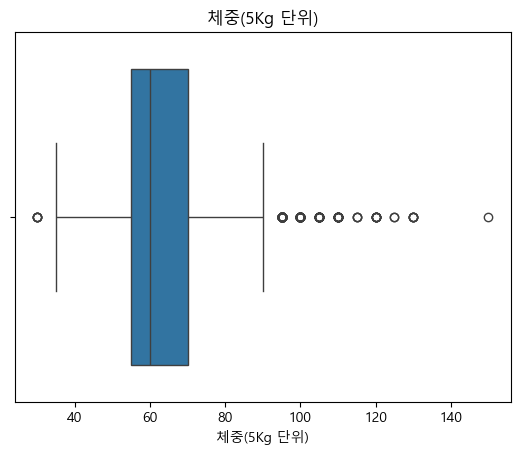

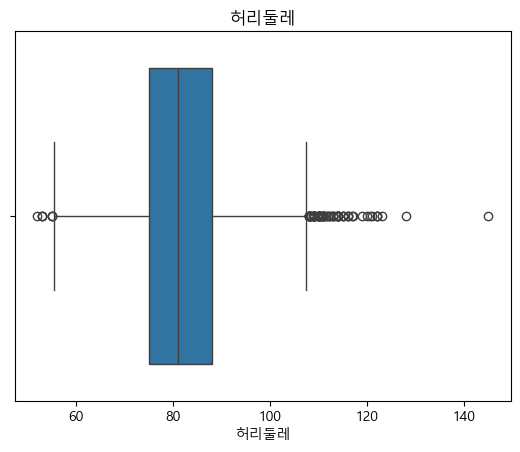

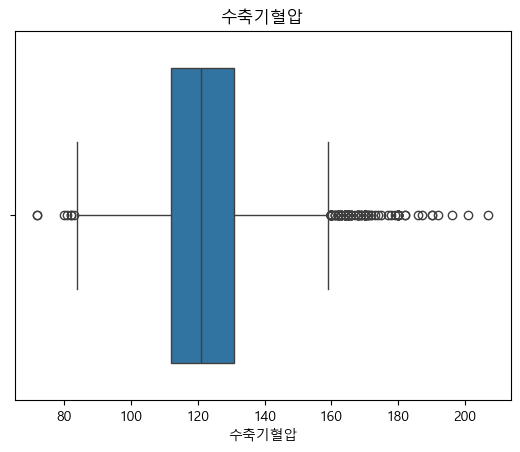

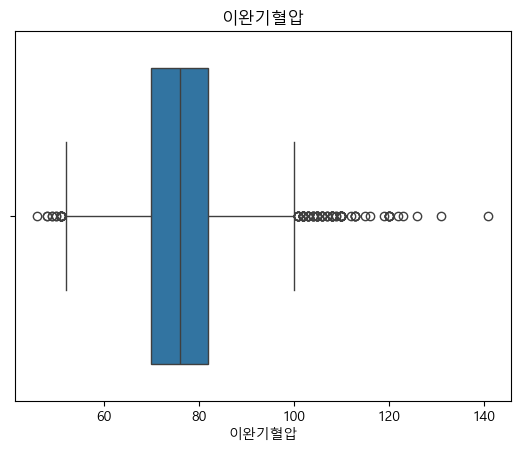

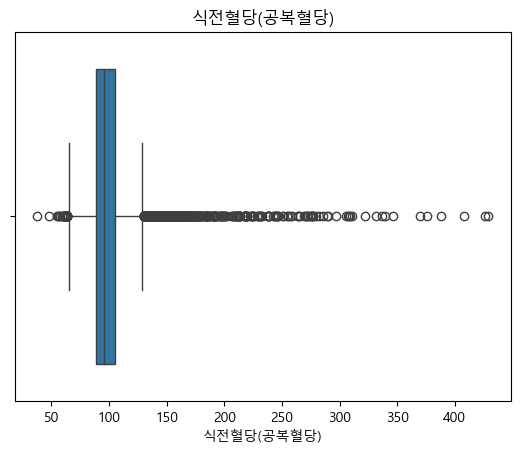

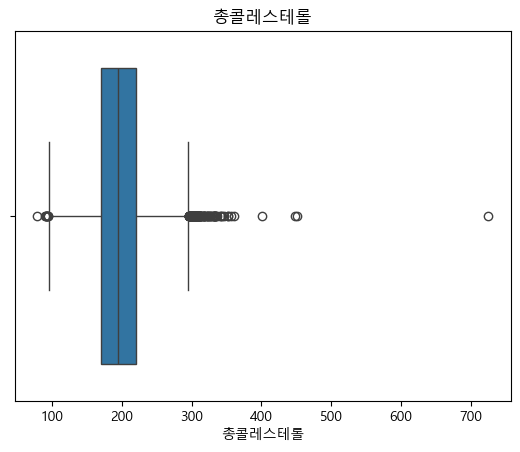

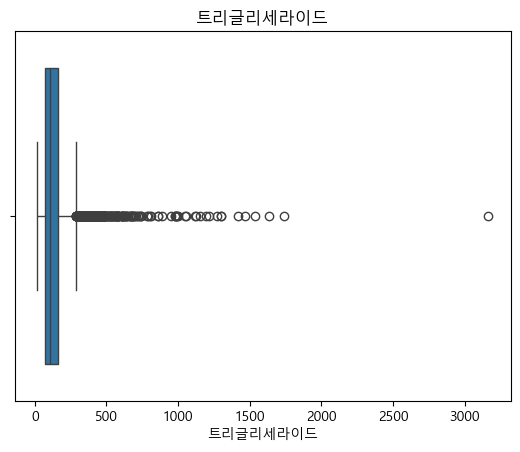

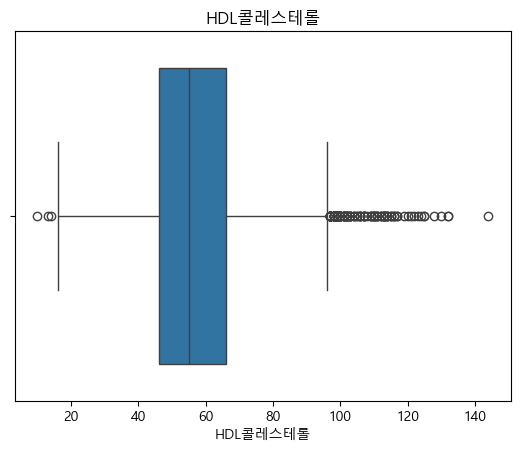

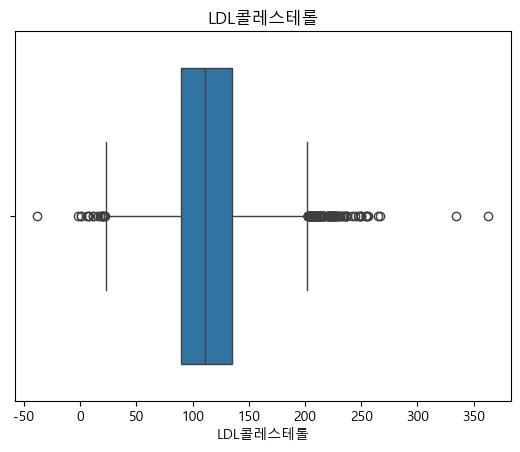

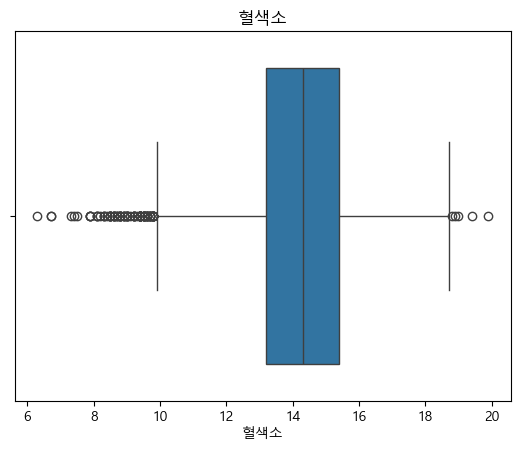

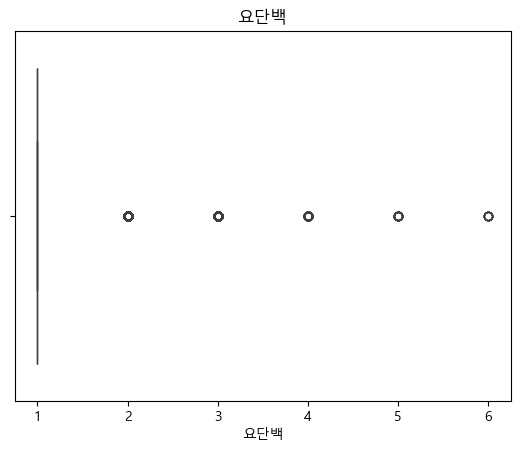

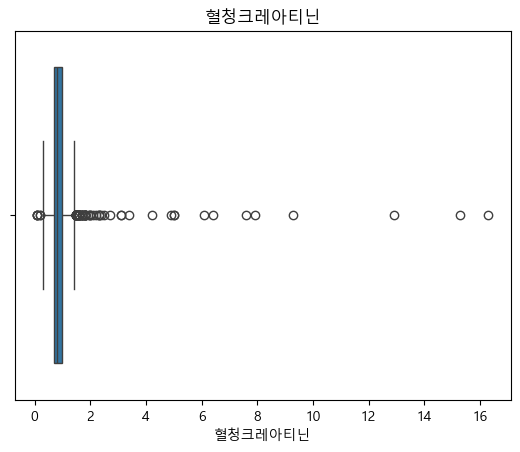

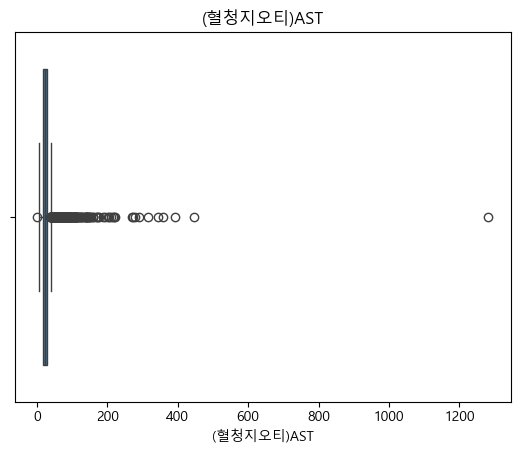

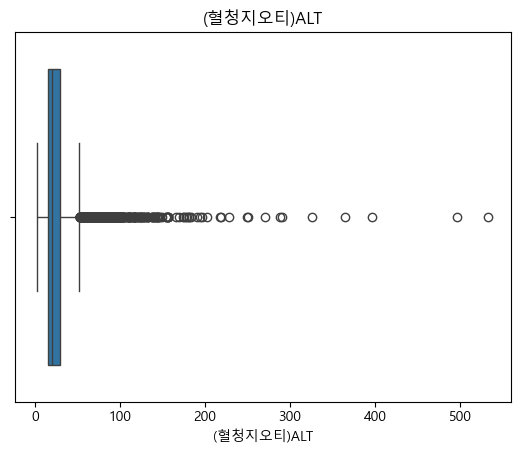

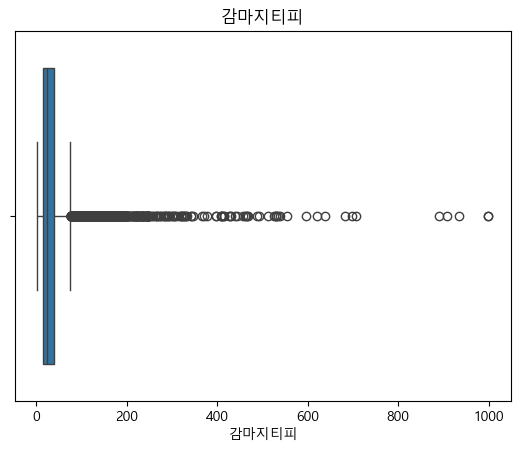

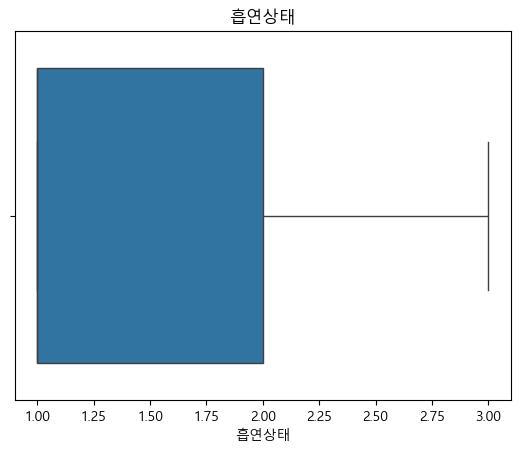

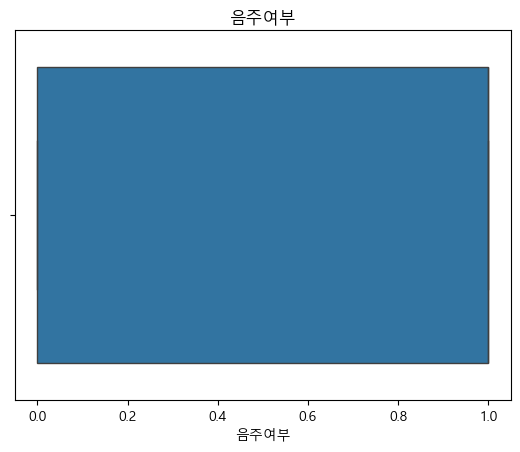

In [15]:
# 박스 플롯을 그려 이상치 확인하기
columns = health.columns

# 숫자형 열에 대해 박스플롯을 그립니다.
for column in columns:
    sns.boxplot(x=health[column])
    plt.title(column)
    plt.show()

In [16]:
# columns = health.columns

# cols = len(columns)


# fig, axes = plt.subplots(6, 6, figsize=(15, 15))  # 전체 그래프 크기 설정

# for i, column in enumerate(columns):
#     row = i // 6
#     col = i % 6
#     sns.boxplot(x=health[column], ax=axes[6, 6])
#     axes[6, 6].set_title(column)

# plt.tight_layout()  # 그래프 간격 조정
# plt.show()

In [17]:
# 박스플롯 확인결과 이상치들은 몸이 이상 있는 것(질병)으로 판단 가능 

#### 상관관계 분석

<Axes: >

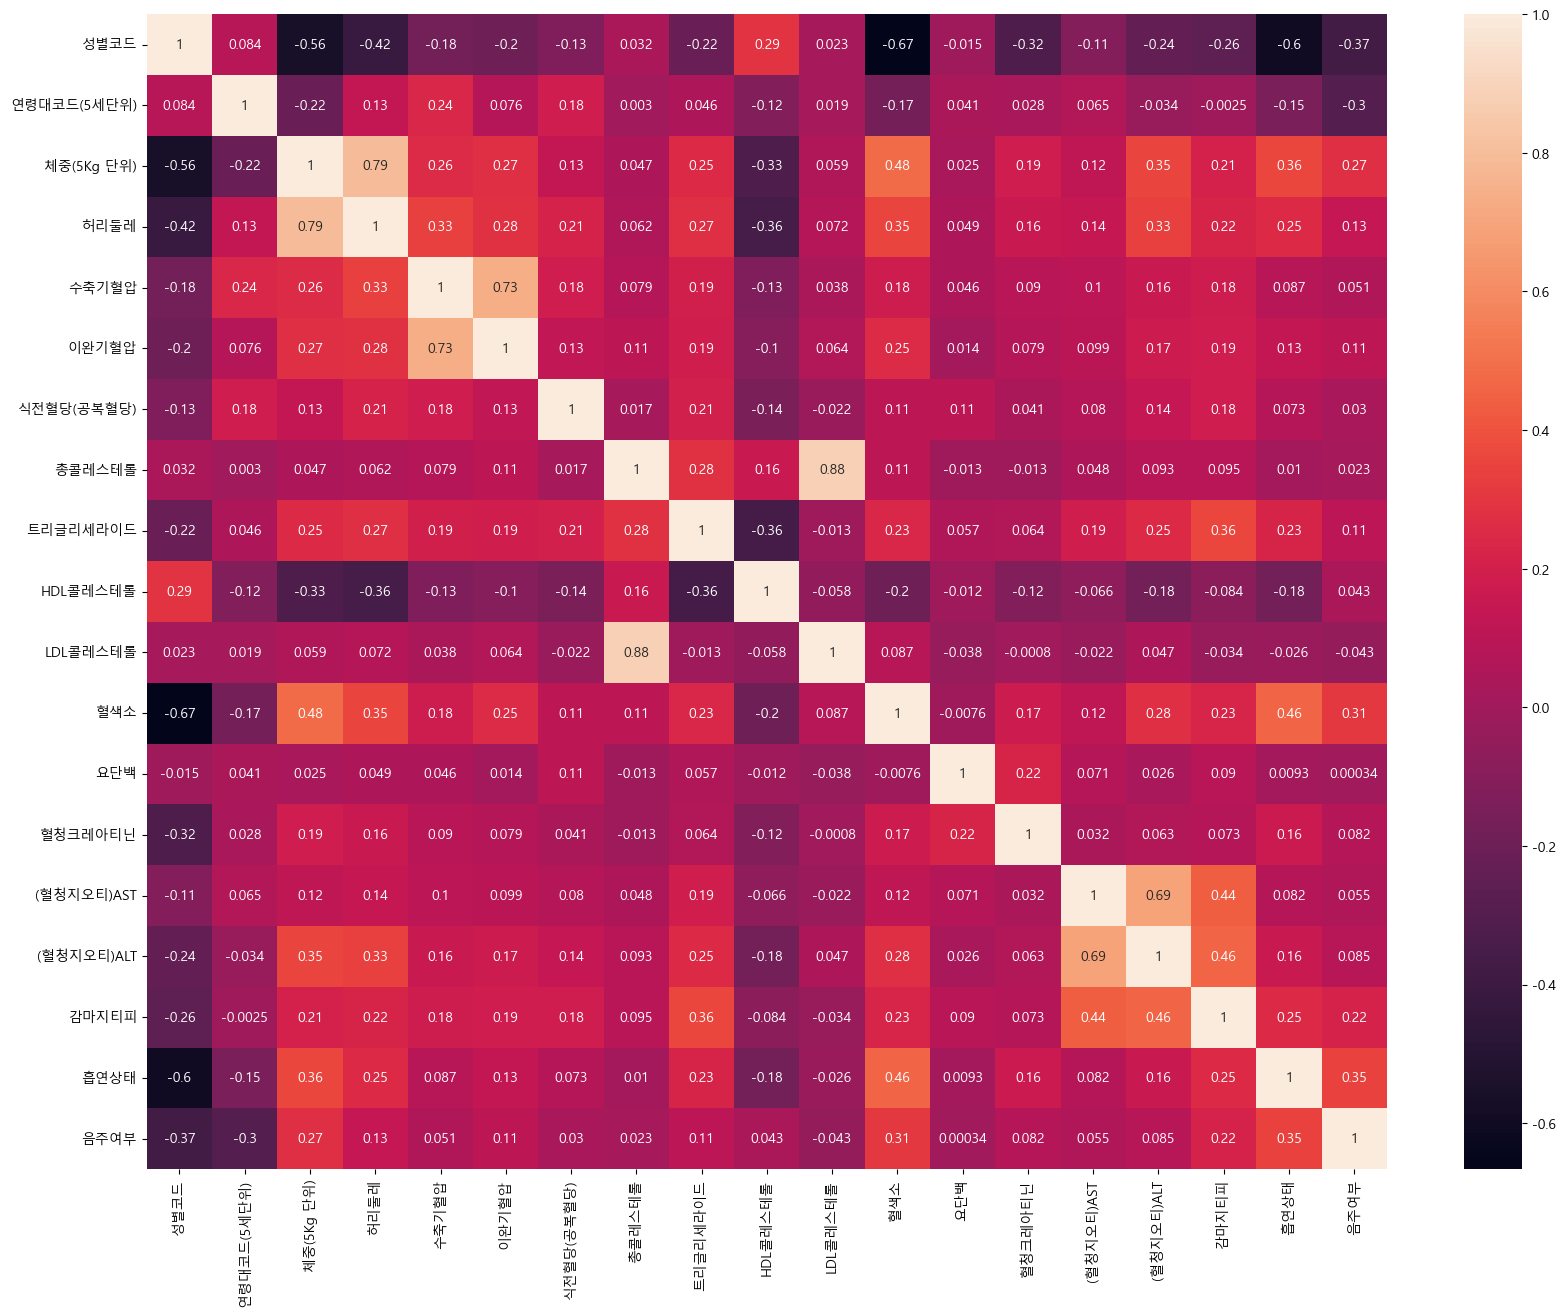

In [19]:
corr = health.corr()

plt.figure(figsize=(20,15))
sns.heatmap(data=corr, annot=True)

In [20]:
# 종속변수(음주여부)와의 상관계수 비교
drinking_corr = health.corr()['음주여부']
drinking_corr

성별코드          -0.368125
연령대코드(5세단위)   -0.297179
체중(5Kg 단위)     0.272594
허리둘레           0.134547
수축기혈압          0.051137
이완기혈압          0.110860
식전혈당(공복혈당)     0.029617
총콜레스테롤         0.023036
트리글리세라이드       0.107732
HDL콜레스테롤       0.042621
LDL콜레스테롤      -0.043435
혈색소            0.305364
요단백            0.000336
혈청크레아티닌        0.081537
(혈청지오티)AST     0.055081
(혈청지오티)ALT     0.084665
감마지티피          0.217500
흡연상태           0.348330
음주여부           1.000000
Name: 음주여부, dtype: float64

In [21]:
# 다중공선성 판단
health_x = health.drop('음주여부', axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = health_x.columns
vif_data["VIF"] = [variance_inflation_factor(health_x.values, i) for i in range(health_x.shape[1])]
vif_data

,Feature,VIF
0,성별코드,16.388773
1,연령대코드(5세단위),23.895638
2,체중(5Kg 단위),115.180444
3,허리둘레,256.911657
4,수축기혈압,176.630099
5,이완기혈압,140.735492
6,식전혈당(공복혈당),20.829195
7,총콜레스테롤,938.925836
8,트리글리세라이드,19.100411
9,HDL콜레스테롤,90.437197


In [22]:
# 다중공선성 서로에게 영향을 주는 지 판단
# 체중과 허리둘레가 서로 영향을 주는 것으로 판단
# 총 콜레스테롤은 트리글리세라이드, HDL, LDL 콜레스트롤의 계산식으로 구함
# 공복혈당과 혈색소가 서로 영향을 줌

health_x.drop(['체중(5Kg 단위)', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤'], axis=1, inplace=True)
health_x

,성별코드,연령대코드(5세단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태
0,1,11,88.0,110.0,62.0,113.0,206.0,12.2,4.0,5.0,12.0,11.0,14.0,2.0
1,1,13,91.0,112.0,67.0,86.0,124.0,14.6,1.0,1.2,28.0,23.0,21.0,2.0
2,2,8,73.0,104.0,60.0,96.0,166.0,9.9,1.0,0.5,15.0,9.0,17.0,1.0
3,1,11,82.0,119.0,76.0,104.0,243.0,14.8,1.0,1.0,20.0,16.0,17.0,1.0
4,1,13,90.0,128.0,84.0,97.0,267.0,15.1,1.0,0.8,44.0,29.0,53.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,9,87.0,130.0,80.0,85.0,333.0,16.1,1.0,1.3,34.0,40.0,50.0,3.0
9996,1,11,84.0,132.0,82.0,98.0,269.0,14.9,1.0,1.1,25.0,20.0,35.0,2.0
9997,2,7,81.0,100.0,70.0,100.0,164.0,14.0,1.0,0.7,18.0,14.0,14.0,1.0
9998,1,10,84.0,130.0,81.0,109.0,214.0,15.9,1.0,1.0,20.0,20.0,69.0,2.0


In [23]:
vif_data = pd.DataFrame()
vif_data["Feature"] = health_x.columns
vif_data["VIF"] = [variance_inflation_factor(health_x.values, i) for i in range(health_x.shape[1])]
vif_data

# 다중공선성이 10을 넘으면 다 제거해야하지만 전부 필요한 정보라고 생각하고 연관되어 있는 변수의 단위가 달라 통일하기 어려워 그대로 사용

,Feature,VIF
0,성별코드,12.612753
1,연령대코드(5세단위),17.899524
2,허리둘레,93.117482
3,수축기혈압,175.755259
4,이완기혈압,140.512119
5,식전혈당(공복혈당),20.619972
6,총콜레스테롤,28.563339
7,혈색소,94.025668
8,요단백,7.487589
9,혈청크레아티닌,7.700998


### 훈련, 검증, 테스트 데이터 분리

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = health_x
y = health['음주여부']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# 데이터 표준화 (스케일링 필요 모델만 적용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 학습 데이터 표준화
X_val_scaled = scaler.transform(X_val)  # 검증 데이터 표준화
X_test_scaled = scaler.transform(X_test)  # 테스트 데이터 표준화

In [110]:
# 결과를 담을 컬럼 생성
accuarcy_results = []
results = []

### 로지스틱 회귀

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# 로지스틱 회귀 (표준화된 데이터 사용)
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

# 모델 예측값
y_train_pred = lr.predict(X_train_scaled)
y_val_pred = lr.predict(X_val_scaled)
y_test_pred = lr.predict(X_test_scaled)
y_test_prob = lr.predict_proba(X_test_scaled)[:, 1]

# 학습 및 검증 데이터 정확도
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터 프레임에 담기
accuracy_lr = {
    "Model_Name": "LogisticRegression",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_lr = pd.DataFrame([accuracy_lr])
print(accu_lr)

# 오차행렬 및 auc값 구하기
accuracy = round(accuracy_score(y_test, y_test_pred),2)
precision = round(precision_score(y_test, y_test_pred),2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터 프레임에 담기
results_metrix = {
    "Model_Name": "LogisticRegression",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}
results_lr = pd.DataFrame([results_metrix])
print(results_lr)

           Model_Name    훈련 정확도    검증 정확도   테스트 정확도
0  LogisticRegression  0.723408  0.718319  0.722027
           Model_Name  Accuracy  Precision  Recall  F1-score   AUC
0  LogisticRegression      0.72       0.73    0.72      0.72  0.79


### 의사결정 나무 (Decision Tree)

#### 하이퍼파라미터 튜닝 전

In [240]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(max_depth = 3, random_state=42)
dt.fit(X_train, y_train)

# 모델 예측값
y_train_pred = dt.predict(X_train)
y_val_pred = dt.predict(X_val)
y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)[:, 1]

# 학습 및 검증 데이터 정확도
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터 프레임에 담기
accuracy_dt = {
    "Model_Name": "DecisionTree",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_dt = pd.DataFrame([accuracy_dt])
print(accu_dt)

# 오차행렬 및 auc값 구하기
accuracy = round(accuracy_score(y_test, y_test_pred),2)
precision = round(precision_score(y_test, y_test_pred),2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터 프레임에 담기
results_metrix = {
    "Model_Name": "DecisionTree",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}
results_dt = pd.DataFrame([results_metrix])
print(results_dt)

     Model_Name    훈련 정확도  검증 정확도   테스트 정확도
0  DecisionTree  0.709131  0.7133  0.722027
     Model_Name  Accuracy  Precision  Recall  F1-score   AUC
0  DecisionTree      0.72       0.69     0.8      0.74  0.78


#### 하이퍼파라미터 튜닝 후

In [223]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 탐색할 하이퍼파라미터 정의
param_grid = {
    'max_depth': [3, 5, 10, None],  # 트리의 깊이 3, 5, 10, None
    'min_samples_split': [2, 10, 20],  # 분할을 위한 최소 샘플 수 2, 10, 20
    'min_samples_leaf': [1, 2, 5],  # 리프 노드의 최소 샘플 수 1, 2, 5
    'max_features': ['auto', 'sqrt', 'log2', None],  # 분할에 사용할 최대 특성 개수
}

# DecisionTreeClassifier 모델 생성
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 3. 그리드 서치로 하이퍼파라미터 최적화
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 4. 그리드 서치로 모델 학습
grid_search.fit(X_train, y_train)

# 5. 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 6. 최적 모델 사용
best_dt = grid_search.best_estimator_

# 7. 예측 수행
y_train_pred = best_dt.predict(X_train)
y_val_pred = best_dt.predict(X_val)
y_test_pred = best_dt.predict(X_test)
y_test_prob = best_dt.predict_proba(X_test)[:, 1]

# 8. 정확도 계산
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터프레임에 담기
accuracy_lr = {
    "Model_Name": "DecisionTree",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_dt = pd.DataFrame([accuracy_lr])
print(accu_dt)

# 오차행렬 및 AUC 계산
accuracy = round(accuracy_score(y_test, y_test_pred), 2)
precision = round(precision_score(y_test, y_test_pred), 2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터프레임에 담기
results_metrix = {
    "Model_Name": "DecisionTree",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}
results_dt = pd.DataFrame([results_metrix])
print(results_dt)
# precision 값이 내려갔지만 Recall값이 올라 F1-score값이 올라 하이퍼파라미터 튜닝후 값을 사용

Fitting 5 folds for each of 144 candidates, totalling 720 fits
최적 하이퍼파라미터: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
     Model_Name    훈련 정확도  검증 정확도   테스트 정확도
0  DecisionTree  0.709131  0.7133  0.722027
     Model_Name  Accuracy  Precision  Recall  F1-score   AUC
0  DecisionTree      0.72       0.69     0.8      0.74  0.78


### Random Forest

#### 하이퍼파라미터 튜닝 전

In [315]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

# 모델 예측값
y_train_pred = rf.predict(X_train)
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:, 1]

# 학습 및 검증 데이터 정확도
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터 프레임에 담기
accuracy_rf = {
    "Model_Name": "RandomForest",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_rf = pd.DataFrame([accuracy_rf])
print(accu_rf)

# 오차행렬 및 auc값 구하기
accuracy = round(accuracy_score(y_test, y_test_pred),2)
precision = round(precision_score(y_test, y_test_pred),2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터 프레임에 담기
results_metrix = {
    "Model_Name": "RandomForest",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}
results_rf = pd.DataFrame([results_metrix])
print(results_rf)

     Model_Name  훈련 정확도    검증 정확도   테스트 정확도
0  RandomForest     1.0  0.719573  0.727045
     Model_Name  Accuracy  Precision  Recall  F1-score   AUC
0  RandomForest      0.73       0.72    0.75      0.73  0.79


#### 하이퍼파라미터 튜닝 후

In [317]:
from sklearn.ensemble import RandomForestClassifier

# 탐색할 하이퍼파라미터 정의
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [None, 10, 20, 30],  # 최대 깊이
    'min_samples_split': [2, 5, 10],  # 내부 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2'],  # 사용할 특성 개수
    'bootstrap': [True, False]  # 부트스트랩 샘플링 여부
}

# 랜덤 포레스트 모델 생성
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# GridSearchCV 설정 (교차 검증 3-fold 사용)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# 그리드 서치 실행
grid_search.fit(X_train, y_train)  # 여기서 모델이 자동으로 학습됨!

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델 사용
best_rf = grid_search.best_estimator_

# 모델 예측값
y_train_pred = best_rf.predict(X_train)
y_val_pred = best_rf.predict(X_val)
y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:, 1]

# 학습 및 검증 데이터 정확도
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터 프레임에 담기
accuracy_rf = {
    "Model_Name": "RandomForest",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_rf = pd.DataFrame([accuracy_rf])
print(accu_rf)

# 오차행렬 및 auc값 구하기
accuracy = round(accuracy_score(y_test, y_test_pred),2)
precision = round(precision_score(y_test, y_test_pred),2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터 프레임에 담기
results_metrix = {
    "Model_Name": "RandomForest",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}
results_rf = pd.DataFrame([results_metrix])
print(results_rf)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
최적 하이퍼파라미터: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
     Model_Name    훈련 정확도    검증 정확도   테스트 정확도
0  RandomForest  0.831974  0.734003  0.728048
     Model_Name  Accuracy  Precision  Recall  F1-score  AUC
0  RandomForest      0.73       0.71    0.77      0.74  0.8


### Extra Tree

### 하이퍼파라미터 튜닝 전

In [259]:
# 데이터 스케일링 사용

from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
et.fit(X_train_scaled, y_train)

# 모델 예측값
y_train_pred = et.predict(X_train_scaled)
y_val_pred = et.predict(X_val_scaled)
y_test_pred = et.predict(X_test_scaled)
y_test_prob = et.predict_proba(X_test_scaled)[:, 1]

# 학습 및 검증 데이터 정확도
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터 프레임에 담기
accuracy_et = {
    "Model_Name": "ExtraTree",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_et = pd.DataFrame([accuracy_et])
print(accu_et)

# 오차행렬 및 auc값 구하기
accuracy = round(accuracy_score(y_test, y_test_pred),2)
precision = round(precision_score(y_test, y_test_pred),2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터 프레임에 담기
results_metrix = {
    "Model_Name": "ExtraTree",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}
results_et = pd.DataFrame([results_metrix])
print(results_et)

  Model_Name  훈련 정확도    검증 정확도   테스트 정확도
0  ExtraTree     1.0  0.720201  0.723532
  Model_Name  Accuracy  Precision  Recall  F1-score   AUC
0  ExtraTree      0.72       0.71    0.76      0.74  0.79


#### 하이퍼파라미터 튜닝 후

In [309]:
# 하이퍼파라미터 후보 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [None, 10, 20, 30],  # 최대 깊이
    'min_samples_split': [2, 5, 10],  # 내부 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드 최소 샘플 수
    'max_features': ['sqrt', 'log2', None],  # 사용할 특성 개수
    'bootstrap': [True, False]  # 부트스트랩 샘플링 여부
}

# ExtraTreesClassifier 모델 생성
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)

# GridSearchCV 설정 (스케일링된 데이터 사용)
grid_search = GridSearchCV(estimator=et, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# 그리드 서치 실행 (스케일링된 데이터 사용)
grid_search.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델 저장
best_et = grid_search.best_estimator_

# 모델 예측값
y_train_pred = best_et.predict(X_train_scaled)
y_val_pred = best_et.predict(X_val_scaled)
y_test_pred = best_et.predict(X_test_scaled)
y_test_prob = best_et.predict_proba(X_test_scaled)[:, 1]

# 학습 및 검증 데이터 정확도
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터 프레임에 담기
accuracy_et = {
    "Model_Name": "ExtraTree",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_et = pd.DataFrame([accuracy_et])
print(accu_et)

# 오차행렬 및 auc값 구하기
accuracy = round(accuracy_score(y_test, y_test_pred),2)
precision = round(precision_score(y_test, y_test_pred),2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터 프레임에 담기
results_metrix = {
    "Model_Name": "ExtraTree",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}
results_et = pd.DataFrame([results_metrix])
print(results_et)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
최적 하이퍼파라미터: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
  Model_Name    훈련 정확도    검증 정확도   테스트 정확도
0  ExtraTree  0.872451  0.720828  0.730557
  Model_Name  Accuracy  Precision  Recall  F1-score  AUC
0  ExtraTree      0.73       0.71    0.78      0.75  0.8


### Gradient Boosting

#### 하이퍼파라미터 튜닝 전

In [261]:
# 데이터 스케일링 사용

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

# 모델 예측값
y_train_pred = gb.predict(X_train_scaled)
y_val_pred = gb.predict(X_val_scaled)
y_test_pred = gb.predict(X_test_scaled)
y_test_prob = gb.predict_proba(X_test_scaled)[:, 1]

# 학습 및 검증 데이터 정확도
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터 프레임에 담기
accuracy_gb = {
    "Model_Name": "GradientBoosting",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_gb = pd.DataFrame([accuracy_gb])
print(accu_gb)

# 오차행렬 및 auc값 구하기
accuracy = round(accuracy_score(y_test, y_test_pred),2)
precision = round(precision_score(y_test, y_test_pred),2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터 프레임에 담기
results_metrix = {
    "Model_Name": "GradientBoosting",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}
results_gb = pd.DataFrame([results_metrix])
print(results_gb)

         Model_Name    훈련 정확도    검증 정확도   테스트 정확도
0  GradientBoosting  0.763571  0.730866  0.724034
         Model_Name  Accuracy  Precision  Recall  F1-score  AUC
0  GradientBoosting      0.72       0.72    0.75      0.73  0.8


#### 하이퍼파라미터 튜닝 후

In [264]:
# 하이퍼파라미터 후보 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'learning_rate': [0.01, 0.1, 0.2],  # 학습률
    'max_depth': [3, 5, 7],  # 트리 최대 깊이
    'min_samples_split': [2, 5, 10],  # 내부 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드 최소 샘플 수
    'subsample': [0.8, 1.0]  # 부트스트랩 샘플링 비율
}

# GradientBoostingClassifier 모델 생성
gb = GradientBoostingClassifier(random_state=42)

# GridSearchCV 설정 (스케일링된 데이터 사용)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# 그리드 서치 실행 (스케일링된 데이터 사용)
grid_search.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델 저장
best_gb = grid_search.best_estimator_

# 모델 예측값
y_train_pred = best_gb.predict(X_train_scaled)
y_val_pred = best_gb.predict(X_val_scaled)
y_test_pred = best_gb.predict(X_test_scaled)
y_test_prob = best_gb.predict_proba(X_test_scaled)[:, 1]

# 학습 및 검증 데이터 정확도
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터 프레임에 담기
accuracy_gb = {
    "Model_Name": "GradientBoosting",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_gb = pd.DataFrame([accuracy_gb])
print(accu_gb)

# 오차행렬 및 auc값 구하기
accuracy = round(accuracy_score(y_test, y_test_pred),2)
precision = round(precision_score(y_test, y_test_pred),2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터 프레임에 담기
results_metrix = {
    "Model_Name": "GradientBoosting",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}
results_gb = pd.DataFrame([results_metrix])
print(results_gb)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
최적 하이퍼파라미터: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.8}
         Model_Name    훈련 정확도    검증 정확도   테스트 정확도
0  GradientBoosting  0.790869  0.724592  0.723031
         Model_Name  Accuracy  Precision  Recall  F1-score  AUC
0  GradientBoosting      0.72       0.72    0.73      0.73  0.8


### HistGradient Boosting

#### 하이퍼파라미터 튜닝 전

In [270]:
# 데이터 스케일링 사용

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(X_train_scaled, y_train)

# 모델 예측값
y_train_pred = hgb.predict(X_train_scaled)
y_val_pred = hgb.predict(X_val_scaled)
y_test_pred = hgb.predict(X_test_scaled)
y_test_prob = hgb.predict_proba(X_test_scaled)[:, 1]

# 학습 및 검증 데이터 정확도
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터 프레임에 담기
accuracy_hgb = {
    "Model_Name": "HistGradientBoosting",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_hgb = pd.DataFrame([accuracy_hgb])
print(accu_hgb)

# 오차행렬 및 auc값 구하기
accuracy = round(accuracy_score(y_test, y_test_pred),2)
precision = round(precision_score(y_test, y_test_pred),2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터 프레임에 담기
results_metrix = {
    "Model_Name": "HistGradientBoosting",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}
results_hgb = pd.DataFrame([results_metrix])
print(results_hgb)

             Model_Name    훈련 정확도  검증 정확도   테스트 정확도
0  HistGradientBoosting  0.871039  0.7133  0.716508
             Model_Name  Accuracy  Precision  Recall  F1-score   AUC
0  HistGradientBoosting      0.72       0.71    0.74      0.72  0.79


#### 하이퍼파라미터 튜닝 후

In [273]:
# 하이퍼파라미터 후보 설정
param_grid = {
    'max_iter': [100, 200, 300],  # 트리 개수
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # 학습률
    'max_depth': [3, 5, 7, None],  # 트리 깊이
    'min_samples_leaf': [10, 20, 30],  # 리프 노드 최소 샘플 수
    'max_bins': [255, 512],  # 히스토그램 bin 개수
    'l2_regularization': [0.0, 0.1, 0.5, 1.0]  # L2 정규화
}

# 모델 생성
hgb = HistGradientBoostingClassifier(random_state=42)

# GridSearchCV 설정 (교차 검증 3-fold 사용)
grid_search = GridSearchCV(estimator=hgb, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# 실행 (스케일링된 데이터 사용)
grid_search.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델 저장
best_hgb = grid_search.best_estimator_

# 모델 예측값
y_train_pred = best_hgb.predict(X_train_scaled)
y_val_pred = best_hgb.predict(X_val_scaled)
y_test_pred = best_hgb.predict(X_test_scaled)
y_test_prob = best_hgb.predict_proba(X_test_scaled)[:, 1]

# 학습 및 검증 데이터 정확도
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터 프레임에 담기
accuracy_hgb = {
    "Model_Name": "HistGradientBoosting",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_hgb = pd.DataFrame([accuracy_hgb])
print(accu_hgb)

# 오차행렬 및 auc값 구하기
accuracy = round(accuracy_score(y_test, y_test_pred),2)
precision = round(precision_score(y_test, y_test_pred),2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터 프레임에 담기
results_metrix = {
    "Model_Name": "HistGradientBoosting",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}
results_hgb = pd.DataFrame([results_metrix])
print(results_hgb)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits
최적 하이퍼파라미터: {'l2_regularization': 0.1, 'learning_rate': 0.1, 'max_bins': 255, 'max_depth': 3, 'max_iter': 100, 'min_samples_leaf': 20}
             Model_Name    훈련 정확도    검증 정확도   테스트 정확도
0  HistGradientBoosting  0.761688  0.723338  0.723031
             Model_Name  Accuracy  Precision  Recall  F1-score  AUC
0  HistGradientBoosting      0.72       0.72    0.75      0.73  0.8


### XGBoost

#### 하이퍼파라미터 튜닝 전

In [277]:
# 데이터 스케일링 사용

from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
xgb.fit(X_train_scaled, y_train)

# 모델 예측값
y_train_pred = xgb.predict(X_train_scaled)
y_val_pred = xgb.predict(X_val_scaled)
y_test_pred = xgb.predict(X_test_scaled)
y_test_prob = xgb.predict_proba(X_test_scaled)[:, 1]

# 학습 및 검증 데이터 정확도
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터 프레임에 담기
accuracy_xgb = {
    "Model_Name": "XGBoost",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_xgb = pd.DataFrame([accuracy_xgb])
print(accu_xgb)

# 오차행렬 및 auc값 구하기
accuracy = round(accuracy_score(y_test, y_test_pred),2)
precision = round(precision_score(y_test, y_test_pred),2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터 프레임에 담기
results_metrix = {
    "Model_Name": "XGBoost",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}
results_xgb = pd.DataFrame([results_metrix])
print(results_xgb)

  Model_Name    훈련 정확도    검증 정확도   테스트 정확도
0    XGBoost  0.960151  0.695107  0.694932
  Model_Name  Accuracy  Precision  Recall  F1-score   AUC
0    XGBoost      0.69       0.69    0.71       0.7  0.76


#### 하이퍼파라미터 튜닝 후

In [280]:
# 탐색할 하이퍼파라미터 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [3, 5, 7],  # 최대 깊이
    'learning_rate': [0.01, 0.1, 0.2],  # 학습률
    'subsample': [0.7, 0.8, 1.0],  # 샘플링 비율
    'colsample_bytree': [0.7, 0.8, 1.0],  # 특성 선택 비율
    'gamma': [0, 0.1, 0.2],  # 가지치기 규제
    'reg_alpha': [0, 0.1, 0.5],  # L1 규제 (Lasso)
    'reg_lambda': [1, 1.5, 2]  # L2 규제 (Ridge)
}

# XGBoost 모델 생성
xgb = XGBClassifier(tree_method="hist", random_state=42)

# GridSearchCV 설정 (교차 검증 3-fold 사용)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')

# 최적 하이퍼파라미터 탐색
grid_search.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델 적용
best_xgb = grid_search.best_estimator_

# 모델 예측값
y_train_pred = best_xgb.predict(X_train_scaled)
y_val_pred = best_xgb.predict(X_val_scaled)
y_test_pred = best_xgb.predict(X_test_scaled)
y_test_prob = best_xgb.predict_proba(X_test_scaled)[:, 1]

# 학습 및 검증 데이터 정확도
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터 프레임에 담기
accuracy_xgb = {
    "Model_Name": "XGBoost",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_xgb = pd.DataFrame([accuracy_xgb])
print(accu_xgb)

# 오차행렬 및 auc값 구하기
accuracy = round(accuracy_score(y_test, y_test_pred),2)
precision = round(precision_score(y_test, y_test_pred),2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터 프레임에 담기
results_metrix = {
    "Model_Name": "XGBoost",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}
results_xgb = pd.DataFrame([results_metrix])
print(results_xgb)

Fitting 3 folds for each of 6561 candidates, totalling 19683 fits
최적 하이퍼파라미터: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 2, 'subsample': 0.8}
  Model_Name    훈련 정확도    검증 정확도   테스트 정확도
0    XGBoost  0.757609  0.725847  0.732062
  Model_Name  Accuracy  Precision  Recall  F1-score   AUC
0    XGBoost      0.73       0.73    0.75      0.74  0.81


### Light GBM

#### 하이퍼파라미터 튜닝 전

In [287]:
# 데이터 스케일링 사용

from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train_scaled, y_train)

# 모델 예측값
y_train_pred = lgb.predict(X_train_scaled)
y_val_pred = lgb.predict(X_val_scaled)
y_test_pred = lgb.predict(X_test_scaled)
y_test_prob = lgb.predict_proba(X_test_scaled)[:, 1]

# 학습 및 검증 데이터 정확도
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터 프레임에 담기
accuracy_lgb = {
    "Model_Name": "LightGBM",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_lgb = pd.DataFrame([accuracy_lgb])
print(accu_lgb)

# 오차행렬 및 auc값 구하기
accuracy = round(accuracy_score(y_test, y_test_pred),2)
precision = round(precision_score(y_test, y_test_pred),2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터 프레임에 담기
results_metrix = {
    "Model_Name": "LightGBM",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}
results_lgb = pd.DataFrame([results_metrix])
print(results_lgb)

[LightGBM] [Info] Number of positive: 3212, number of negative: 3162
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1348
[LightGBM] [Info] Number of data points in the train set: 6374, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503922 -> initscore=0.015689
[LightGBM] [Info] Start training from score 0.015689
  Model_Name    훈련 정확도    검증 정확도   테스트 정확도
0   LightGBM  0.877942  0.715182  0.709985
  Model_Name  Accuracy  Precision  Recall  F1-score   AUC
0   LightGBM      0.71       0.71    0.73      0.72  0.79


#### 하이퍼 파라미터 튜닝 후

In [300]:
# 탐색할 하이퍼파라미터 설정
param_grid = {
    'n_estimators': [100, 200],  # 트리 개수 100, 300, 500
    'max_depth': [10, 20],  # 최대 깊이 (-1은 제한 없음) -1, 10, 20
    'learning_rate': [0.05, 0.1],  # 학습률 0.01, 0.05, 0.1
    'num_leaves': [20, 31],  # 리프 노드 개수 20, 31, 40
    'colsample_bytree': [0.8, 1.0],  # 특성 샘플링 비율 0.7, 0.8, 1.0
    'subsample': [0.8, 1.0],  # 데이터 샘플링 비율 0.7, 0.8, 1.0
    'reg_alpha': [0, 0.1, 1],  # L1 정규화 0, 0.1, 0.5
    'reg_lambda': [0, 1, 2]  # L2 정규화 0, 1, 2
}

# LightGBM 모델 생성
lgb = LGBMClassifier(random_state=42, device='gpu')

# GridSearchCV 설정 (교차 검증 3-fold 사용)
grid_search = GridSearchCV(estimator=lgb, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')

# 최적 하이퍼파라미터 탐색
grid_search.fit(X_train_scaled, y_train)

# 최적 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델 적용
best_lgb = grid_search.best_estimator_

# 모델 예측값
y_train_pred = best_lgb.predict(X_train_scaled)
y_val_pred = best_lgb.predict(X_val_scaled)
y_test_pred = best_lgb.predict(X_test_scaled)
y_test_prob = best_lgb.predict_proba(X_test_scaled)[:, 1]

# 학습 및 검증 데이터 정확도
train_accu = accuracy_score(y_train, y_train_pred)
val_accu = accuracy_score(y_val, y_val_pred)
test_accu = accuracy_score(y_test, y_test_pred)

# 결과를 데이터 프레임에 담기
accuracy_lgb = {
    "Model_Name": "LightGBM",
    "훈련 정확도": train_accu,
    "검증 정확도": val_accu,
    "테스트 정확도": test_accu
}
accu_lgb = pd.DataFrame([accuracy_lgb])
print(accu_lgb)

# 오차행렬 및 auc값 구하기
accuracy = round(accuracy_score(y_test, y_test_pred),2)
precision = round(precision_score(y_test, y_test_pred),2)
recall = round(recall_score(y_test, y_test_pred), 2)
f1 = round(f1_score(y_test, y_test_pred), 2)
auc = round(roc_auc_score(y_test, y_test_prob), 2)

# 결과를 데이터 프레임에 담기
results_metrix = {
    "Model_Name": "LightGBM",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "AUC": auc
}

results_lgb = pd.DataFrame([results_metrix])
print(results_lgb)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[LightGBM] [Info] Number of positive: 3212, number of negative: 3162
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1348
[LightGBM] [Info] Number of data points in the train set: 6374, number of used features: 14
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics 770, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 13 dense feature groups (0.10 MB) transferred to GPU in 0.001455 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503922 -> initscore=0.015689
[LightGBM] [Info] Start training from score 0.015689
최적 하이퍼파라미터: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 20, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 1.0}
  Model_Name   훈련 정확도   검증 정확도   테스트 

### 분석 모델링 결과

In [325]:
# 훈련, 검증, 테스트 정확도 데이터 프레임
accu = pd.concat([accu_lr, accu_dt, accu_rf, accu_et, accu_gb, accu_hgb, accu_xgb, accu_lgb])
accu

,Model_Name,훈련 정확도,검증 정확도,테스트 정확도
0,LogisticRegression,0.723408,0.718319,0.722027
0,DecisionTree,0.709131,0.713300,0.722027
0,RandomForest,0.831974,0.734003,0.728048
0,ExtraTree,0.872451,0.720828,0.730557
0,GradientBoosting,0.790869,0.724592,0.723031
0,HistGradientBoosting,0.761688,0.723338,0.723031
0,XGBoost,0.757609,0.725847,0.732062
0,LightGBM,0.779730,0.725220,0.727045


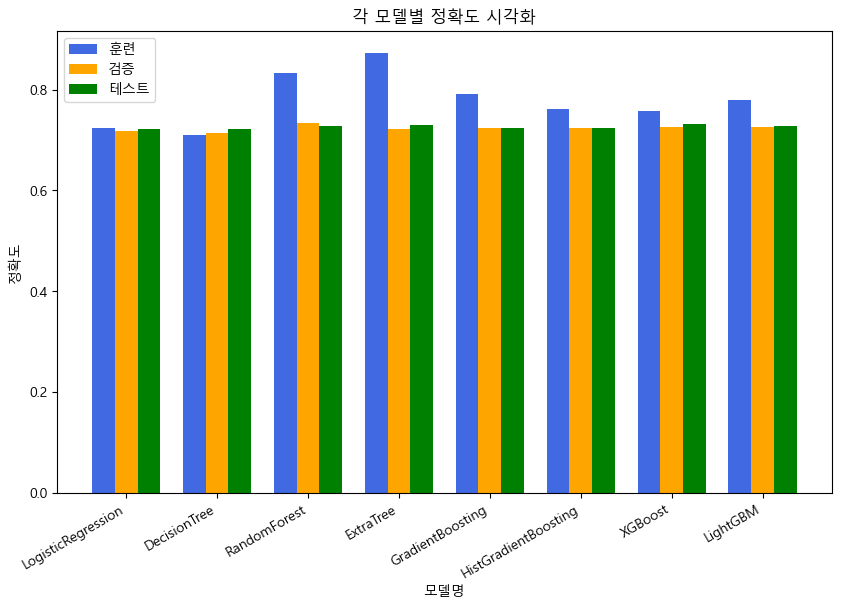

In [329]:
# 데이터 시각화

plt.figure(figsize=(10, 6))

# X축 위치 지정
x = np.arange(len(accu["Model_Name"]))  # 모델 개수만큼 X축 인덱스 생성
width = 0.25  # 막대 너비

# 각 데이터의 막대 그래프 생성
plt.bar(x - width, accu["훈련 정확도"], width=width, label="훈련", color='royalblue')
plt.bar(x, accu["검증 정확도"], width=width, label="검증", color='orange')
plt.bar(x + width, accu["테스트 정확도"], width=width, label="테스트", color='green')

# X축 눈금 설정 (모델 이름)
plt.xticks(x, accu["Model_Name"], rotation=30, ha="right")

# 제목 & 범례 & 축 라벨
plt.xlabel("모델명")
plt.ylabel("정확도")
plt.title("각 모델별 정확도 시각화")
plt.legend()

# 그래프 출력
plt.show()

In [323]:
# 각 모델별, 정확도, 정밀도, F1_Score, AUC 데이터 프레임

result = pd.concat([results_lr, results_dt, results_rf, results_et, results_gb, results_hgb, results_xgb, results_lgb])
result

,Model_Name,Accuracy,Precision,Recall,F1-score,AUC
0,LogisticRegression,0.72,0.73,0.72,0.72,0.79
0,DecisionTree,0.72,0.69,0.80,0.74,0.78
0,RandomForest,0.73,0.71,0.77,0.74,0.80
0,ExtraTree,0.73,0.71,0.78,0.75,0.80
0,GradientBoosting,0.72,0.72,0.73,0.73,0.80
0,HistGradientBoosting,0.72,0.72,0.75,0.73,0.80
0,XGBoost,0.73,0.73,0.75,0.74,0.81
0,LightGBM,0.73,0.72,0.74,0.73,0.80


In [331]:
result.to_excel('분류모델_모델별정확도값_도지훈.xlsx', index=False)